In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns


# Data Cleaning & Pre-processing

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.columns[df.isna().any()]

Index([], dtype='object')

There is no Missing values in dataset

In [6]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Data is already pre-processed

# EDA

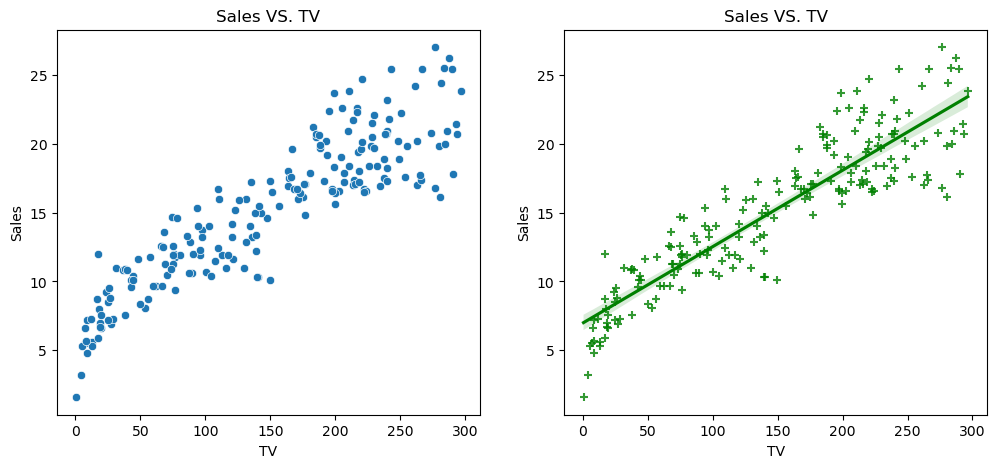

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df,x='TV',y='Sales')
plt.title('Sales VS. TV')


plt.subplot(1,2,2)
sns.regplot(data=df,x='TV',y='Sales',color='g',marker='+')
plt.title('Sales VS. TV')


plt.show()

From above Fig
- As advertising goes high, Sales also go hgih
- There is linear relation between Sales and TV

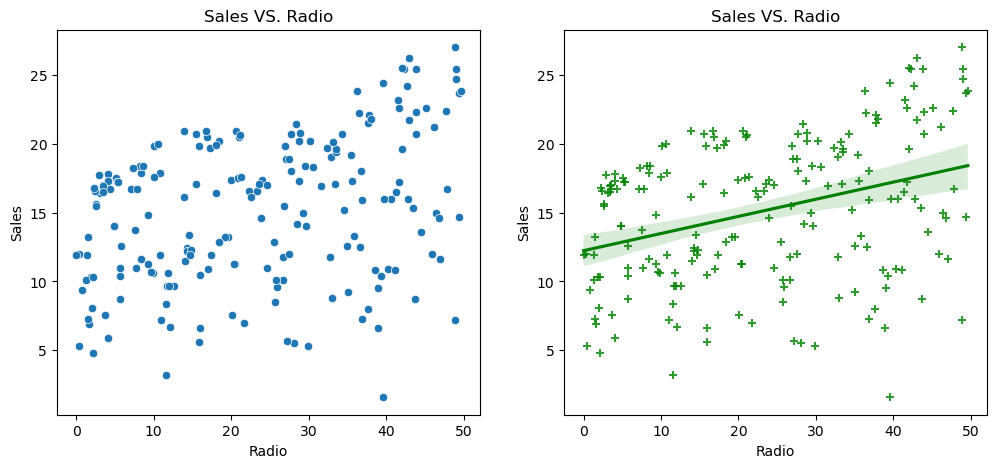

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df,x='Radio',y='Sales')
plt.title('Sales VS. Radio')


plt.subplot(1,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='g',marker='+')
plt.title('Sales VS. Radio')


plt.show()

From above Fig
- There is linear relation between Sales and Radio but the realtion is too weak.
- There is many outliers

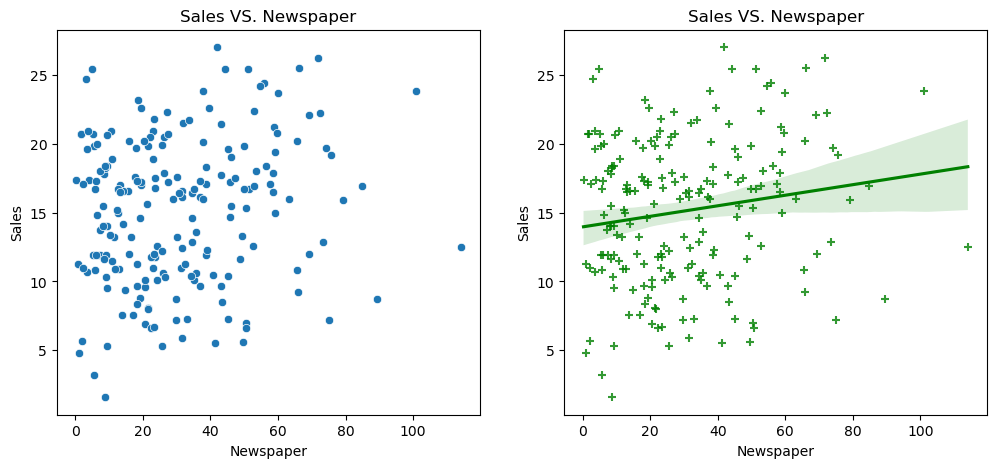

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df,x='Newspaper',y='Sales')
plt.title('Sales VS. Newspaper')


plt.subplot(1,2,2)
sns.regplot(data=df,x='Newspaper',y='Sales',color='g',marker='+')
plt.title('Sales VS. Newspaper')


plt.show()

From Above Fig
- The Sales are high, when adversting was less
- There is no pointing in doing adversting in NewsPaper

# Feature Engineering

In [10]:
inputs=df.drop('Sales',axis=1)
target=df.Sales

In [11]:
inputs_cols=inputs.columns.tolist()

In [12]:
inputs_cols

['TV', 'Radio', 'Newspaper']

## Scaling

In [13]:
inputs.head(2)

TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(inputs[inputs_cols])
inputs[inputs_cols]=scaler.transform(inputs[inputs_cols])

In [15]:
inputs.head(2)

TV     Radio  Newspaper
0  0.775786  0.762097   0.605981
1  0.148123  0.792339   0.394019

## Split Data

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=42)

In [33]:
X_train.shape

(160, 3)

In [34]:
X_test.shape

(40, 3)

# Model Building

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(n_jobs=-1)

In [36]:
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [37]:
model.score(X_test,y_test)

0.9059011844150826

Normally our model  give 90% accuracy on unseen data,so there is no need of Evaluation

# Final Model

In [41]:
model=LinearRegression(n_jobs=-1,)
model.fit(inputs,target)


LinearRegression(n_jobs=-1)

# Save Model

In [42]:
import joblib as jb

In [43]:
jb.dump(model,'Adv_model')

['Adv_model']

Model have Saved